# ANALISIS EXPLORATORIO DE DATOS (EDA)



In [ ]:
# Importar las bibliotecas necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [ ]:
# Importar los datasets

games = pd.read_parquet("datasets/df_steam_games.parquet")
reviews = pd.read_parquet("datasets/user_reviews.parquet")
items = pd.read_parquet("datasets/users_items.parquet")

CONTENIDO DEL EDA
- outliers o anomalias
- analisis estadistico de datos
- análisis de correlaciones bi y multivariado

Evaluar cantidad total de comentarios positivos, neutros y nulos
* 54.4% de comentarios positivos
* 35% de comentarios neutros
* 10% de comentarios negativos

In [36]:
reviews['sentiment_analysis'].value_counts()

sentiment_analysis
2    31790
1    20480
0     6160
Name: count, dtype: int64

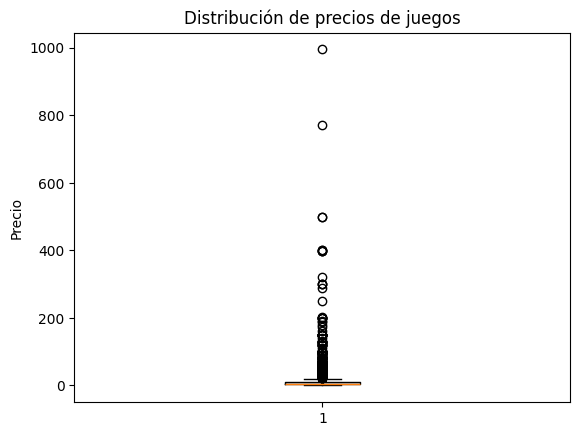

In [43]:
plt.boxplot(games['price'])
plt.title('Distribución de precios de juegos')
plt.ylabel('Precio')
plt.show()

Se aprecia outliers en los precios que se alejan mucho de la media

In [63]:
games[games["price"]>500]

,item_id,app_name,release_year,price,developer,genres
2219,292180,X-Plane 10 Global - 64 Bit,2014,771.71,Laminar Research,[Simulation]
10371,719000,Strata Spaces VR – Professional Edition Upgrade,2017,995.00,"Strata Mixed Reality, Inc.","[Animation &amp; Modeling, Design &amp; Illust..."


Se investigó sobre estos juegos y los precios son correctos, por lo tanto estos outliers no se tratan de un error

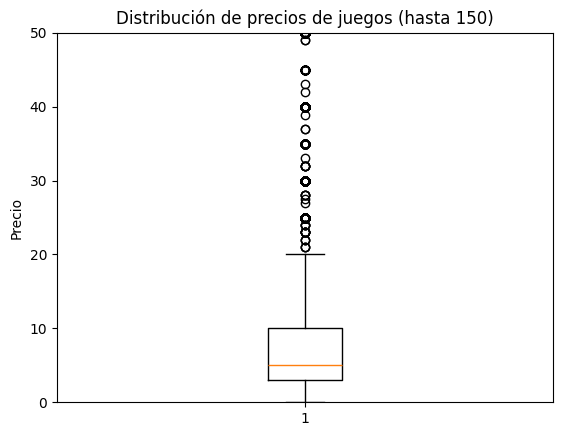

In [65]:
# Evaluar la distribución de precios en el boxplot limitando la variable precio hast 50

plt.boxplot(games['price'])
plt.ylim(0, 50) 
plt.title('Distribución de precios de juegos (hasta 50)')
plt.ylabel('Precio')    
plt.show()


In [5]:
games['price'].describe()

count    27458.000000
mean         9.008520
std         15.985258
min          0.000000
25%          2.990000
50%          4.990000
75%          9.990000
max        995.000000
Name: price, dtype: float64

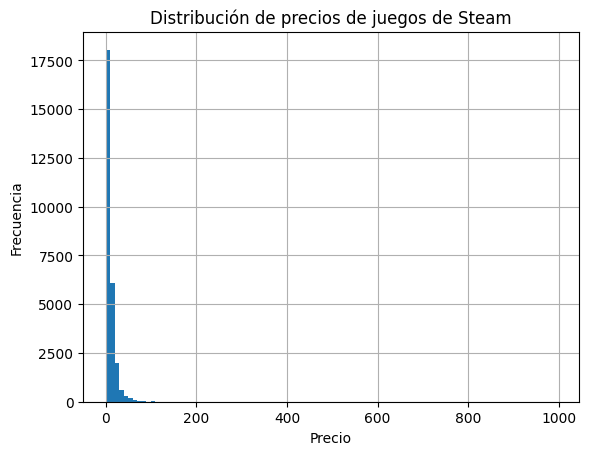

In [6]:
# Evaluar la distribución de precios de los juegos de Steam

games['price'].hist(bins=100)
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Distribución de precios de juegos de Steam')
plt.show()

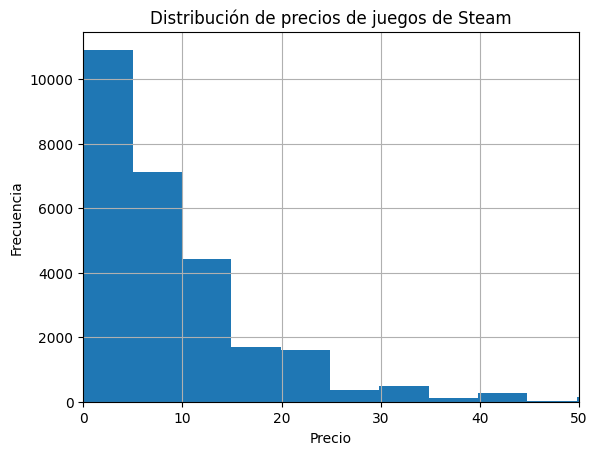

In [71]:
# Limitar la misma

games['price'].hist(bins=200)
plt.xlabel('Precio')
plt.xlim(0, 50)
plt.ylabel('Frecuencia')
plt.title('Distribución de precios de juegos de Steam')
plt.show()

In [6]:
list_genres = []
for indice, lista in enumerate(games["genres"]):
    for elemento in lista:
        if elemento not in list_genres:
            list_genres.append(elemento)


In [31]:
list_genres

['Action',
 'Casual',
 'Indie',
 'Simulation',
 'Strategy',
 'Free to Play',
 'RPG',
 'Sports',
 'Adventure',
 'Racing',
 'Early Access',
 'Massively Multiplayer',
 'Animation &amp; Modeling',
 'Web Publishing',
 'Education',
 'Software Training',
 'Utilities',
 'Design &amp; Illustration',
 'Audio Production',
 'Video Production',
 'Photo Editing',
 'Accounting']

Evaluar cuantos juegos hay por genero

In [55]:
dicgen = {}
for genero in list_genres:
    dicgen[genero] = games[genero].sum()

In [66]:
valores_ordenados = sorted(dicgen.values(), reverse=True)
new_dict = {}
for valor in valores_ordenados:
    for clave, valor_original in dicgen.items():
        if valor_original == valor:
            new_dict[clave] = valor
            break  # Una vez que se encuentra el valor coincidente, pasa al siguiente valor


In [72]:
dicgen

{'Indie': 15081,
 'Action': 10637,
 'Casual': 8052,
 'Adventure': 7781,
 'Strategy': 6676,
 'Simulation': 6494,
 'RPG': 5106,
 'Free to Play': 1869,
 'Early Access': 1382,
 'Sports': 1206,
 'Racing': 1048,
 'Massively Multiplayer': 993,
 'Design &amp; Illustration': 451,
 'Utilities': 319,
 'Web Publishing': 259,
 'Animation &amp; Modeling': 172,
 'Education': 122,
 'Video Production': 103,
 'Software Training': 99,
 'Audio Production': 82,
 'Photo Editing': 77,
 'Accounting': 7}

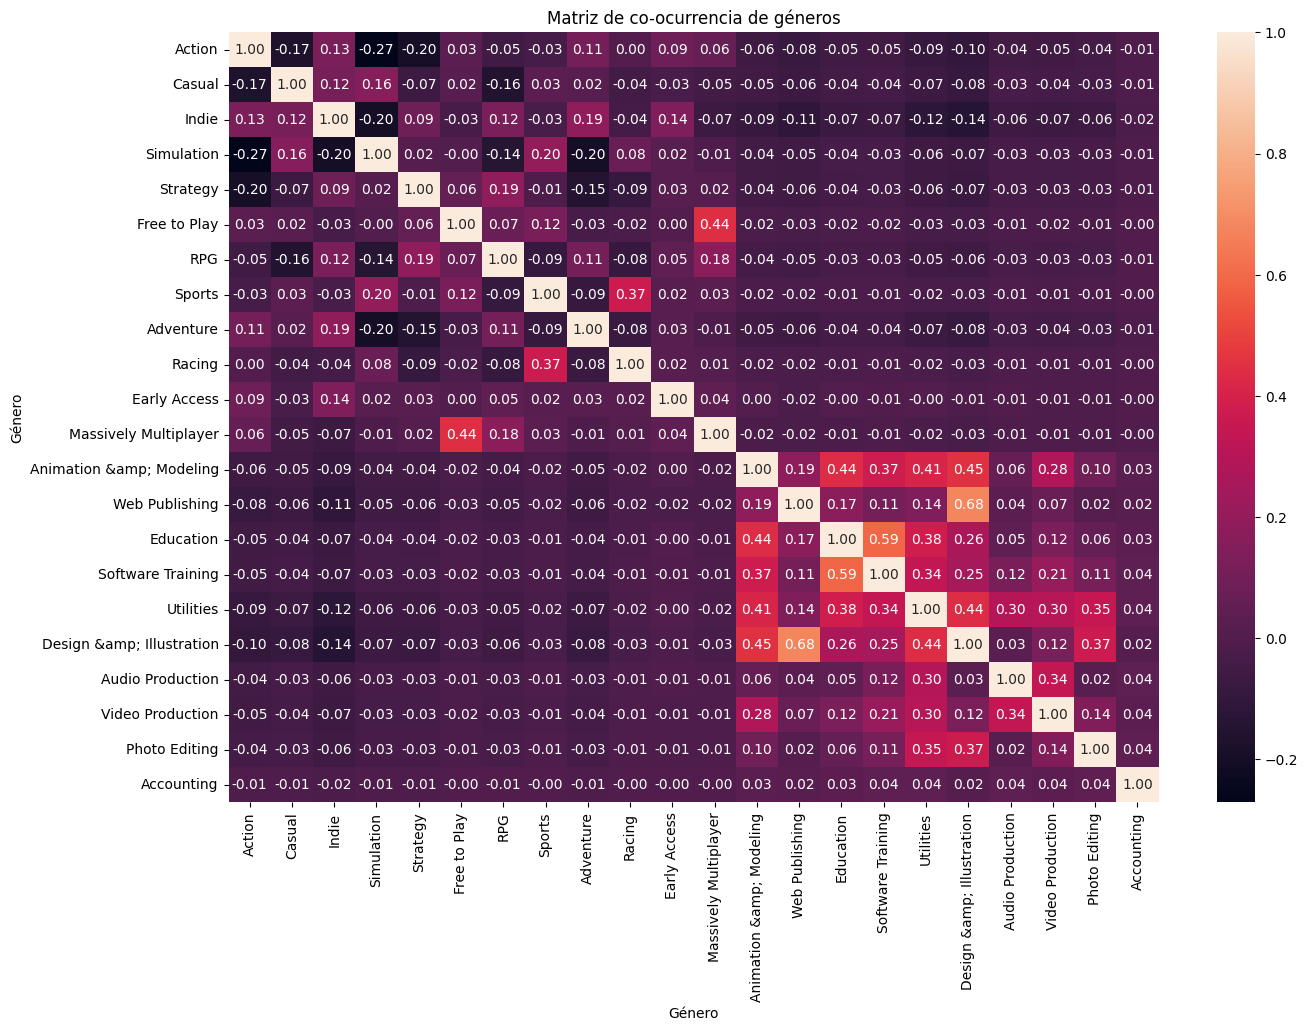

In [95]:
# Correlación entre los géneros

matriz_coocurrencia = df_enmascarado.corr()

# Crea una figura y ejes (ajusta figsize para el tamaño deseado)
fig, ax = plt.subplots(figsize=(15, 10))  # Establece figsize aquí

# Crea el heatmap usando sns.heatmap y los ejes creados
sns.heatmap(matriz_coocurrencia, annot=True, fmt='.2f', ax=ax)  # Pasa ax a sns.heatmap

plt.xlabel('Género')
plt.ylabel('Género')
plt.title('Matriz de co-ocurrencia de géneros')
plt.show()

Algunas conclusiones al observar la matriz:
En esta matriz podemos destacar por ejemplo, que los juegos "Free to play" son en gran medida "Massively Multiplayer"
 - Free to play - Sports
 - Massively Multiplayer - RPG
 - RPG - strategy
 - sports - racing  || sports - simulation
 - adventure - indie

Tambien podemos destacar como aquellos generos que no estan vinculado a los juegos (ej: web publishing, animation ¬modeling, software training, utilities, design & illustration, audio production, etc) estan fuertemente correlacionados. 
 

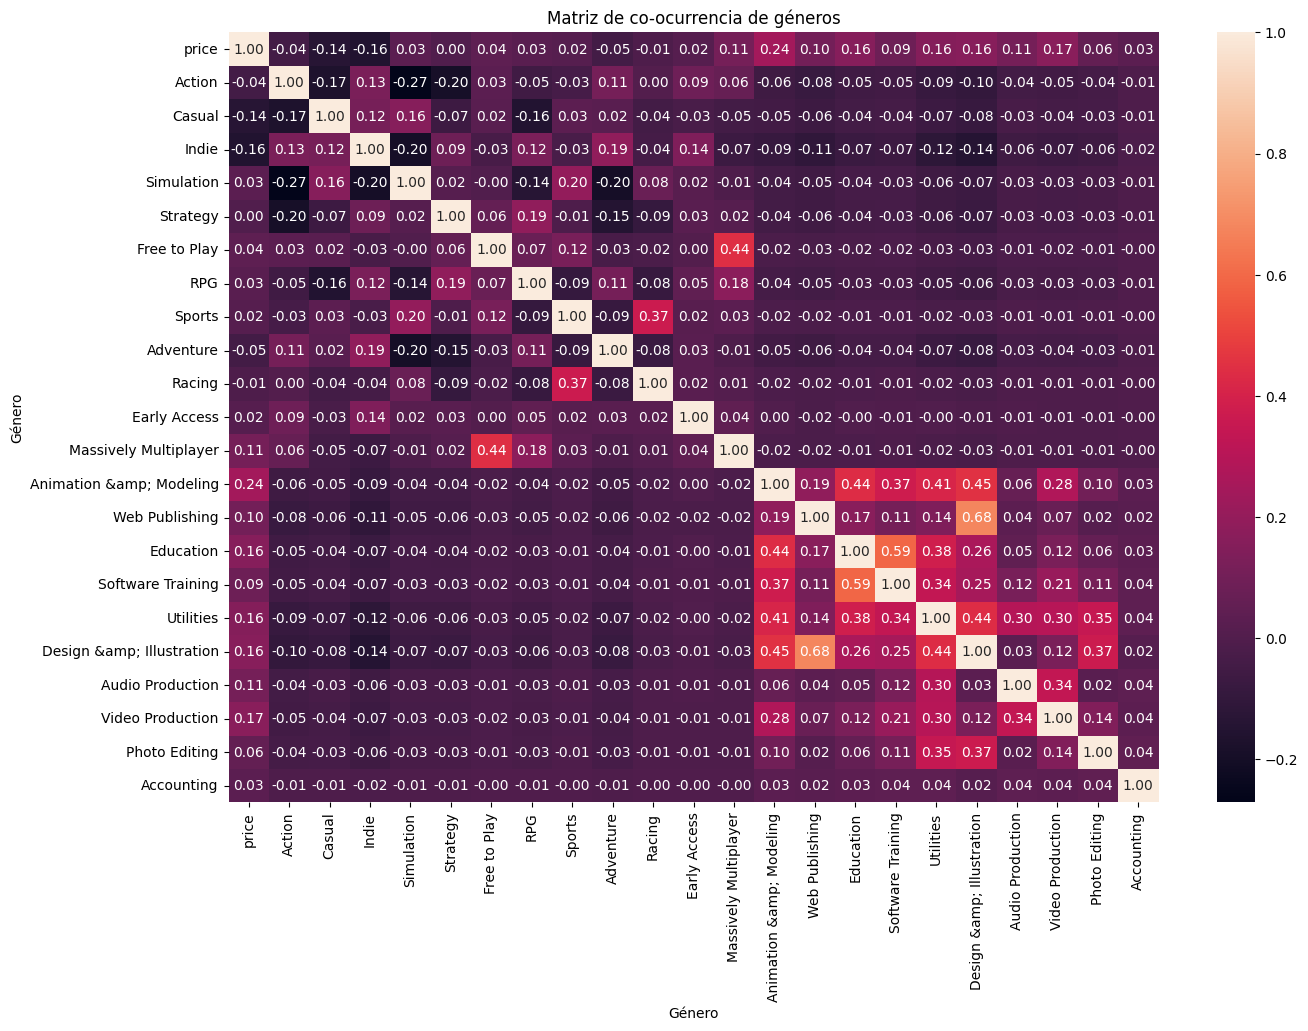

In [139]:
matriz_coocurrencia = df_enmascarado.corr()

# Crea una figura y ejes (ajusta figsize para el tamaño deseado)
fig, ax = plt.subplots(figsize=(15, 10))  # Establece figsize aquí

# Crea el heatmap usando sns.heatmap y los ejes creados
sns.heatmap(matriz_coocurrencia, annot=True, fmt='.2f', ax=ax)  # Pasa ax a sns.heatmap

plt.xlabel('Género')
plt.ylabel('Género')
plt.title('Matriz de co-ocurrencia de géneros')
plt.show()

In [100]:
genero_precio = games.columns[~games.columns.isin(['item_id','app_name','release_year','developer','genres'])]
df_genero_precio = games[genero_precio]

In [101]:
def contar_registros_genero_precio(df, genero, precio):
  """
  Cuenta la cantidad de registros en un DataFrame que coincidan con un género y precio específicos.

  Args:
      df: El DataFrame que contiene los datos.
      genero: El nombre del género a evaluar (en este caso, una columna booleana).
      precio: El valor del precio a evaluar (en este caso, 0.0).

  Returns:
      Un entero que representa la cantidad de registros coincidentes.
  """
  if genero in df.columns:  # Verifica si la columna "genero" existe
    return df[(df[genero] == True) & (df['price'] == precio)].shape[0]
  else:
    raise ValueError(f"La columna '{genero}' no existe en el DataFrame.")

# ... resto del código (creación de diccionario, ordenamiento e impresión) ...


In [102]:
# Recorre cada género y cuenta los registros con price = 0.0
for genero in df_genero_precio.columns:
  if genero != 'price':  # Excluye la columna 'price'
    genero_precio_conteos[genero] = contar_registros_genero_precio(df_genero_precio, genero, 0.0)


In [138]:
dicgen
# Los generos mas comunes son: Indie, Action, Casual, Adventure, Strategy, Simulation y RPG

{'Indie': 15081,
 'Action': 10637,
 'Casual': 8052,
 'Adventure': 7781,
 'Strategy': 6676,
 'Simulation': 6494,
 'RPG': 5106,
 'Free to Play': 1869,
 'Early Access': 1382,
 'Sports': 1206,
 'Racing': 1048,
 'Massively Multiplayer': 993,
 'Design &amp; Illustration': 451,
 'Utilities': 319,
 'Web Publishing': 259,
 'Animation &amp; Modeling': 172,
 'Education': 122,
 'Video Production': 103,
 'Software Training': 99,
 'Audio Production': 82,
 'Photo Editing': 77,
 'Accounting': 7}

In [103]:
genero_precio_conteos
# Los generos con más juegos gratuitos son: Indie, Action, Adventure, Casual, Strategy y RPG

{'Action': 598,
 'Casual': 405,
 'Indie': 866,
 'Simulation': 258,
 'Strategy': 363,
 'Free to Play': 849,
 'RPG': 359,
 'Sports': 68,
 'Adventure': 435,
 'Racing': 60,
 'Early Access': 119,
 'Massively Multiplayer': 256,
 'Animation &amp; Modeling': 21,
 'Web Publishing': 7,
 'Education': 6,
 'Software Training': 5,
 'Utilities': 29,
 'Design &amp; Illustration': 24,
 'Audio Production': 2,
 'Video Production': 14,
 'Photo Editing': 2,
 'Accounting': 1}

In [111]:
games['developer'].value_counts()


developer
Ubisoft - San Francisco       1258
SmiteWorks USA, LLC            812
Dovetail Games                 253
KOEI TECMO GAMES CO., LTD.     215
Paradox Development Studio     153
                              ... 
Triple rush games                1
Storybird,Julien Rocca           1
Light                            1
Jorge Vera Blasco                1
Bidoniera Games                  1
Name: count, Length: 10603, dtype: int64

Los 5 desarrolladores que más juegos lanzaron son:
* Ubisoft - San Francisco       1258
* SmiteWorks USA, LLC            812
* Dovetail Games                 253
* KOEI TECMO GAMES CO., LTD.     215
* Paradox Development Studio     153

In [122]:
games['release_year'].value_counts()

release_year
2017    9059
2016    6536
2015    4433
2014    2512
2013    1395
2012    1098
2011     524
2010     394
2009     309
2008     187
2007     147
2006     139
2005      88
2003      73
2018      69
2004      62
2001      55
1998      48
1999      43
2002      40
1997      39
1996      35
2000      34
1994      31
1995      30
1993      24
1992      13
1991      10
1990       8
1989       7
1988       5
1987       4
1984       2
1983       1
1986       1
2021       1
2019       1
1985       1
Name: count, dtype: int64

El año con más lanzamientos fue 2017 con 9059 juegos

In [126]:
# Evaluar la cantidad de juegos por año

year_counts = games.groupby('release_year')['item_id'].size()
games['release_year'].max()

2021

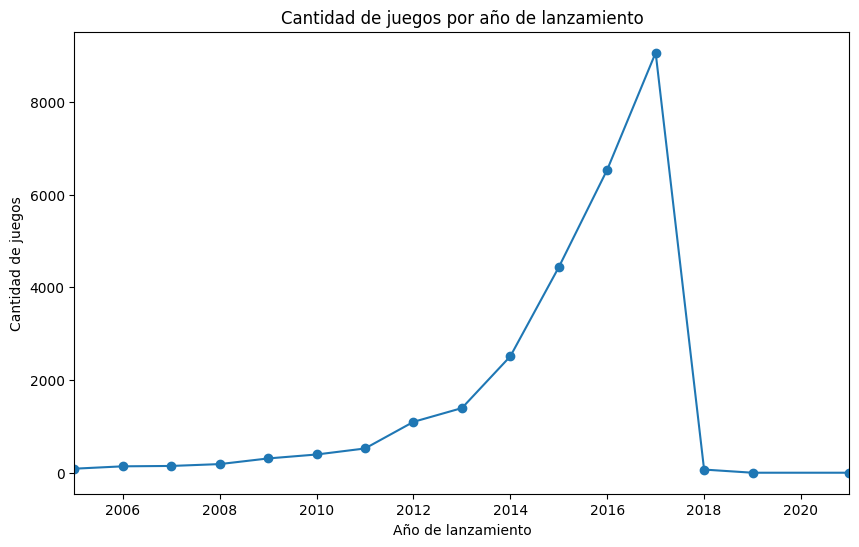

In [127]:
# Cantidad de juegos por año de lanzamiento

plt.figure(figsize=(10, 6))
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de juegos')
plt.title('Cantidad de juegos por año de lanzamiento')
plt.plot(year_counts.index, year_counts.values, marker='o', linestyle='-')  # Eje x: índices de year_counts, eje y: valores de year_counts
# plt.scatter(year_counts.index, year_counts.values)  # Eje x: índices de year_counts, eje y: valores de year_counts
plt.xlim(2005, 2021)  # Establecer el límite inferior en 2005 y el límite superior en 2021

plt.show()

In [137]:
year_counts

release_year
1983       1
1984       2
1985       1
1986       1
1987       4
1988       5
1989       7
1990       8
1991      10
1992      13
1993      24
1994      31
1995      30
1996      35
1997      39
1998      48
1999      43
2000      34
2001      55
2002      40
2003      73
2004      62
2005      88
2006     139
2007     147
2008     187
2009     309
2010     394
2011     524
2012    1098
2013    1395
2014    2512
2015    4433
2016    6536
2017    9059
2018      69
2019       1
2021       1
Name: item_id, dtype: int64

La mayoria de los juegos fueron lanzados entre el 2014 y 2017 (con un pico en 2017) reduciendose abruptamente a partir del 2018 (pero esto puede ser por falta de datos o errores). El año con mas lanzamientos fue 2017 (suponiendo que se trata del ultimo año que se actualizaron correctamente los datos), con más de 9 mil juegos.

In [129]:
# Cuales son los desarrolladores que más juegos Free lanzaron
games[games['price']==0]['developer'].value_counts()

developer
Monster Games                 20
KOEI TECMO GAMES CO., LTD.    10
Quiet River                    9
AMPLITUDE Studios              9
Milestone S.r.l.               8
                              ..
Deck13                         1
YIMING ZHANG                   1
SandorHQ                       1
Gigantoraptor Games            1
KUMA GAMES                     1
Name: count, Length: 1210, dtype: int64

5 de los desarrolladores que más juegos free lanzan son:
* Monster Games                 20
* KOEI TECMO GAMES CO., LTD.    10 (tambien es el 4to mayor desarrollador de juegos en Steam)
* Quiet River                    9
* AMPLITUDE Studios              9
* Milestone S.r.l.               8

In [143]:
# precio promedio de los juegos

games['price'].mean()

9.008519557141817